In [84]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [62]:
# load data
df = pd.read_csv('IMDB-Movie-Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [63]:
df.shape

(1000, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [65]:
# check missing value
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by= 'Count', ascending= False)

,Count,%
Revenue (Millions),128,12.8
Metascore,64,6.4
Rank,0,0.0
Title,0,0.0
Genre,0,0.0
Description,0,0.0
Director,0,0.0
Actors,0,0.0
Year,0,0.0
Runtime (Minutes),0,0.0


Revenue and Metascore column has missing values. I will replace by their field mean value

In [66]:
# replace missing value with mean value of their own fields
df['Metascore'].fillna(df['Metascore'].mean(), inplace = True)
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean(), inplace = True)

In [67]:
# statistics info
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


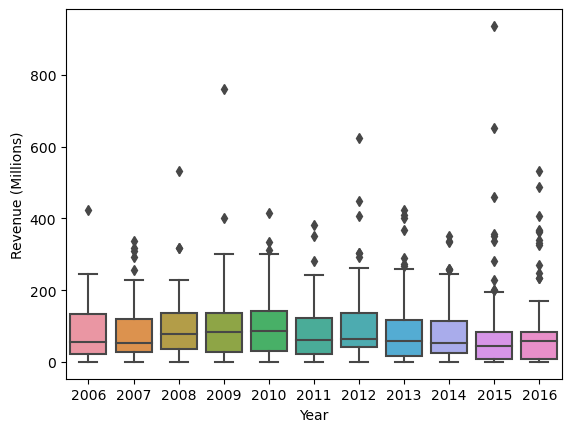

In [68]:
sns.boxplot(data = df,x = 'Year', y = 'Revenue (Millions)')
plt.show()

Highest revenue movies in 2009 and 2015.

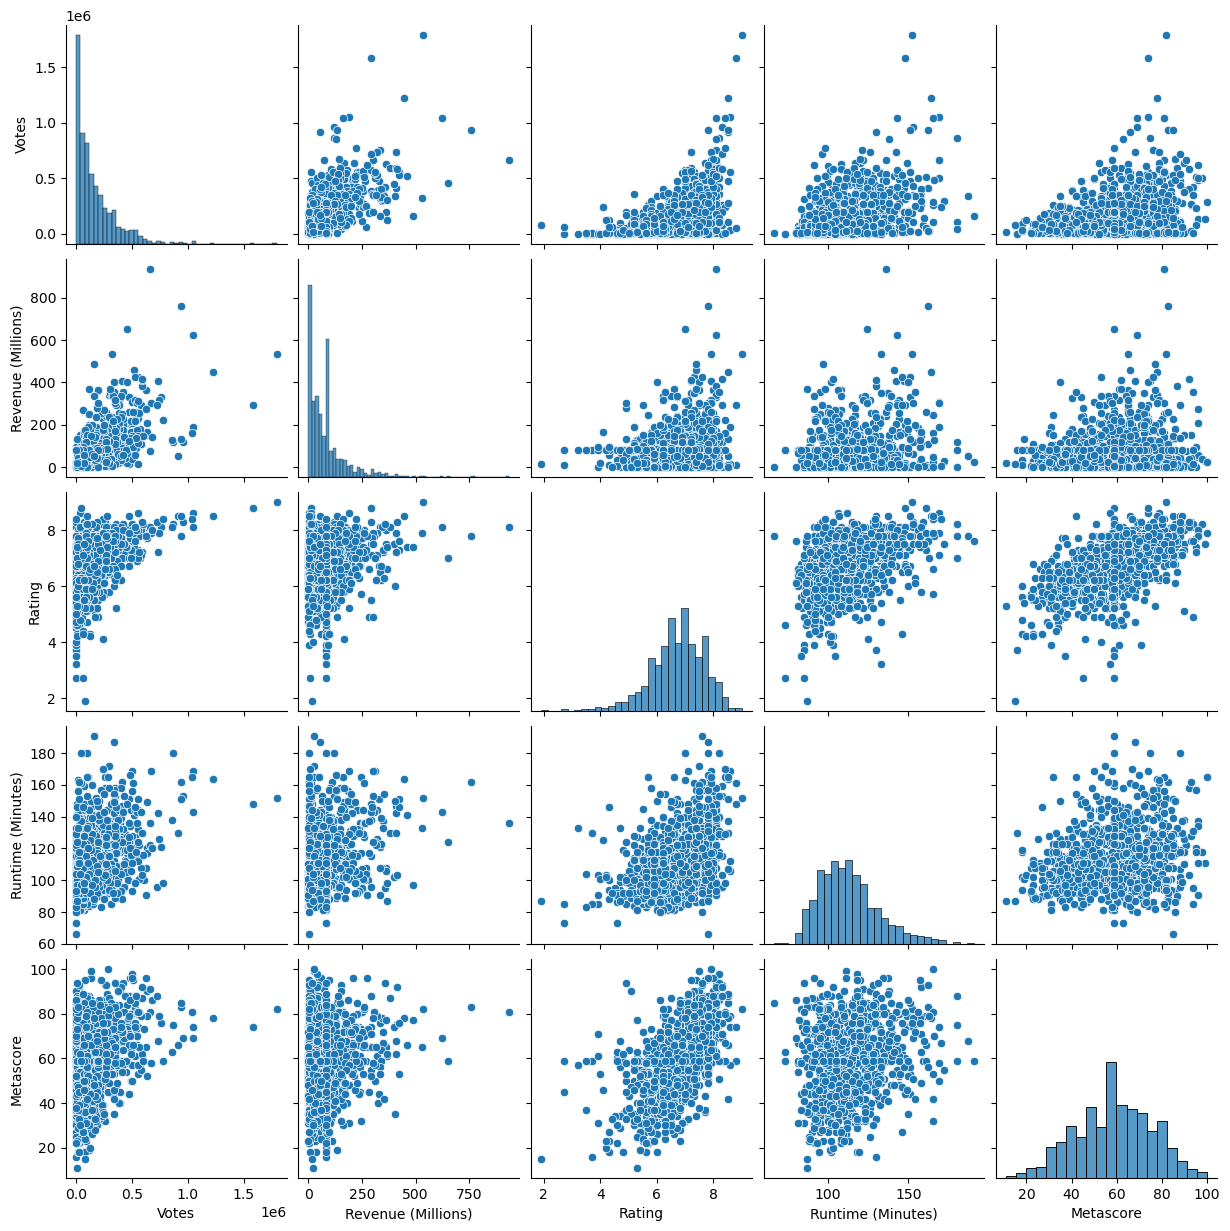

In [69]:
sns.pairplot(data = df, vars = ["Votes", "Revenue (Millions)", "Rating", "Runtime (Minutes)", "Metascore"])
plt.show()

/var/folders/kz/qx62v0210f7dbwdcqg3r84hc0000gn/T/ipykernel_12596/1189427187.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Runtime (Minutes)'],bins=10,kde=True)


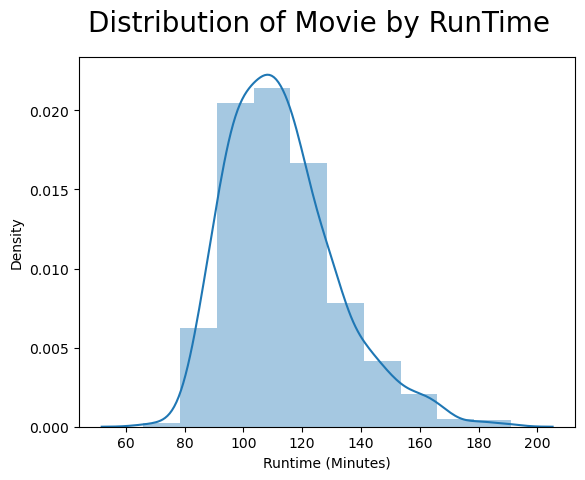

In [70]:
# running time distribution
sns.distplot(df['Runtime (Minutes)'],bins=10,kde=True)
plt.suptitle("Distribution of Movie by RunTime", fontsize=20)
plt.show()

Most of movies have a runtime ranged from 90 to 130 Minutes.

In [71]:
# top 10 earning movie
top10 = df.sort_values(by = "Revenue (Millions)", ascending = False).iloc[ : 10]
top10

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
94,95,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
578,579,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


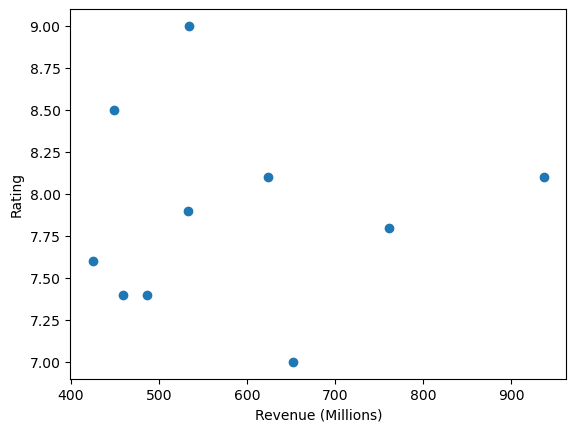

In [72]:
plt.scatter(top10['Revenue (Millions)'], top10['Rating'])
plt.xlabel("Revenue (Millions)")
plt.ylabel("Rating")
plt.show()

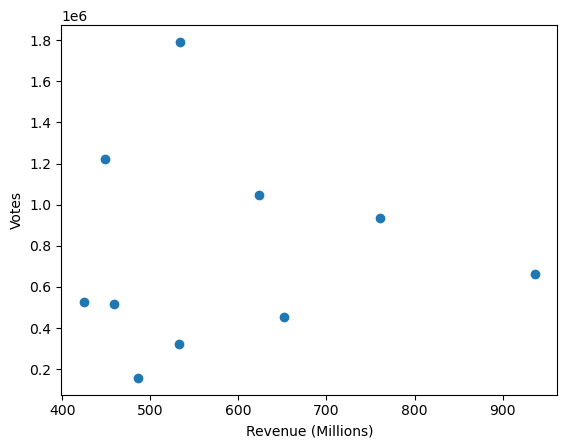

In [73]:
plt.scatter(top10['Revenue (Millions)'], top10['Votes'])
plt.xlabel("Revenue (Millions)")
plt.ylabel("Votes")
plt.show()

In [74]:
# merge data for genre visualization
# add count column for couting number of movies by genre
df['count'] = 1
# slip genre
df[['Genre1', 'Genre2','Genre3']] = df['Genre'].str.split(',', 3, expand = True).fillna(value = "")
# slip actor
df[['Actor1', 'Actor2','Actor3']] = df['Actors'].str.split(',', 2,expand = True).fillna(value = "")
df['Genre2'] = df['Genre2'].fillna(df.Genre1, inplace = True)
df['Genre3'] = df['Genre3'].fillna(df.Genre1, inplace = True)
genre1 = df.groupby('Genre1').sum()
genre2 = df.groupby('Genre2').sum()
genre3 = df.groupby('Genre3').sum()
grouped_genre = genre1.add(genre2, fill_value = 0.0).add(genre3, fill_value = 0.0).reset_index()
grouped_genre

,Genre1,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,count
0,Action,127448.0,589686.0,34385.0,1931.6,69132934.0,35108.078394,15699.805556,293.0
1,Adventure,35570.0,150924.0,8926.0,518.1,16925199.0,8387.025505,4609.940171,75.0
2,Animation,23865.0,98624.0,4809.0,358.9,10199812.0,9153.412752,3432.955128,49.0
3,Biography,32831.0,128860.0,7845.0,468.4,9795886.0,3689.095505,4344.910256,64.0
4,Comedy,99358.0,352254.0,18685.0,1136.3,20237033.0,9623.001147,9782.865385,175.0
5,Crime,37671.0,142895.0,8223.0,483.3,10658872.0,3626.608394,4292.910256,71.0
6,Drama,99964.0,392508.0,22416.0,1356.2,25241800.0,8831.718670,12458.760684,195.0
7,Fantasy,2961.0,8045.0,427.0,23.4,426892.0,292.132752,244.000000,4.0
8,Horror,24977.0,92610.0,4497.0,269.9,3654029.0,2310.660138,2539.955128,46.0
9,Mystery,7427.0,26161.0,1468.0,89.4,2842736.0,874.082752,733.000000,13.0


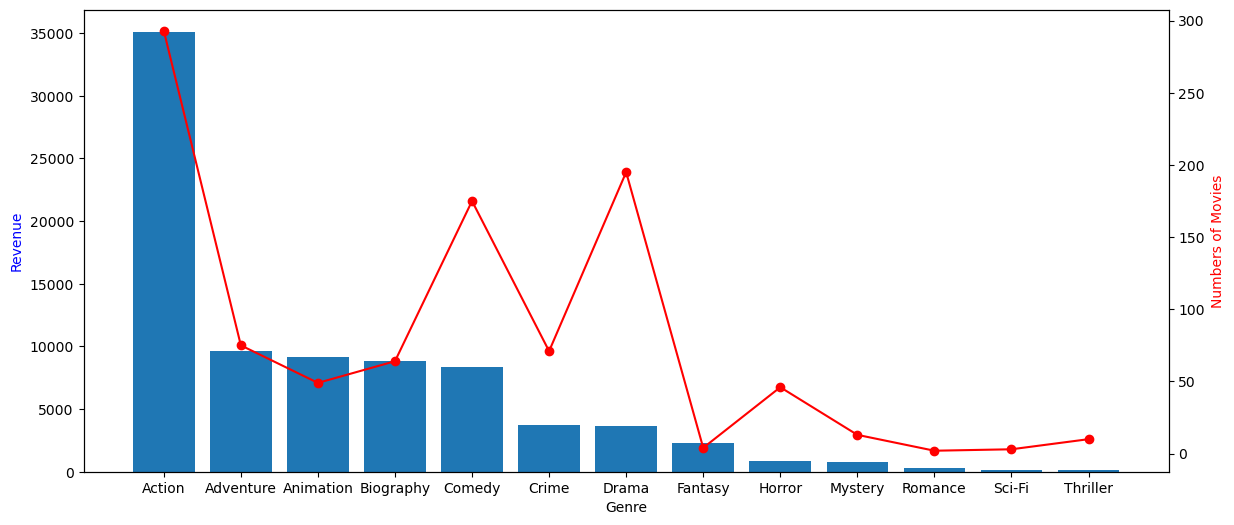

In [75]:
fig, ax1 = plt.subplots(figsize = (14,6))

ax2 = ax1.twinx()
ax1.bar(grouped_genre['Genre1'],grouped_genre['Revenue (Millions)'].sort_values(ascending = False))
ax2.plot(grouped_genre['Genre1'],grouped_genre['count'], 'o-', color="red" )
ax1.set_xlabel('Genre')
ax1.set_ylabel('Revenue', color='b')
ax2.set_ylabel('Numbers of Movies', color='r')
plt.show()

In [76]:
# number of movies by year
movie_by_year = df.groupby('Year')['count'].count().reset_index()
movie_by_year

,Year,count
0,2006,44
1,2007,53
2,2008,52
3,2009,51
4,2010,60
5,2011,63
6,2012,64
7,2013,91
8,2014,98
9,2015,127


Text(0.5, 0, 'Year')

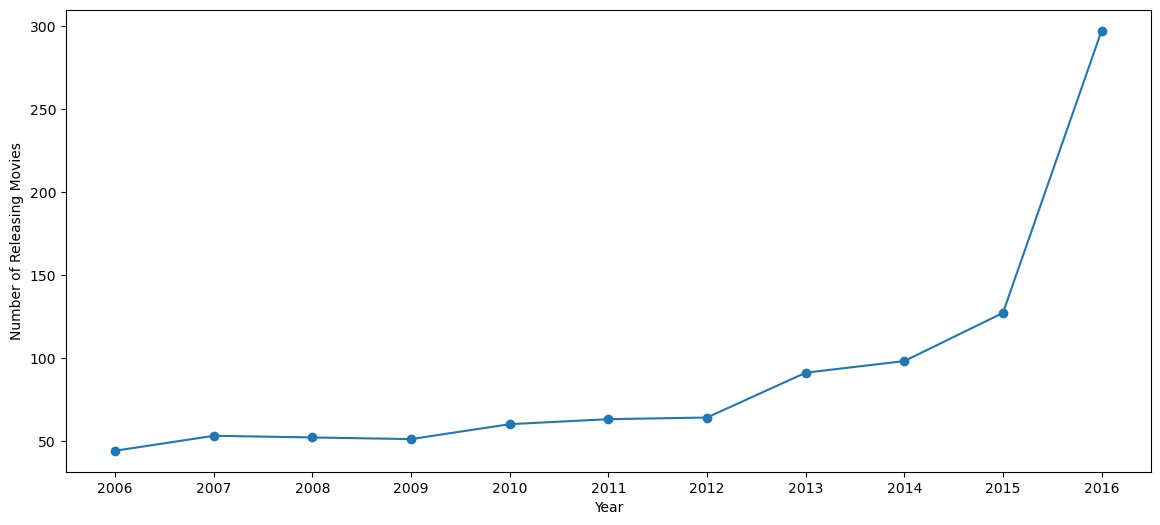

In [77]:
plt.subplots(figsize = (14,6))
plt.plot(movie_by_year['Year'], movie_by_year['count'], 'o-')
plt.xticks(np.arange(min(movie_by_year.Year), max(movie_by_year.Year)+1, 1))
plt.ylabel("Number of Releasing Movies")
plt.xlabel("Year")

In [78]:
# revenue by year
revenue_by_year = df.groupby('Year')['Revenue (Millions)'].sum().round(1).reset_index()
revenue_by_year

,Year,Revenue (Millions)
0,2006,3790.4
1,2007,4638.1
2,2008,5136.2
3,2009,5624.1
4,2010,6238.5
5,2011,5514.9
6,2012,6910.3
7,2013,7915.6
8,2014,8329.2
9,2015,10015.5


Text(0.5, 0, 'Year')

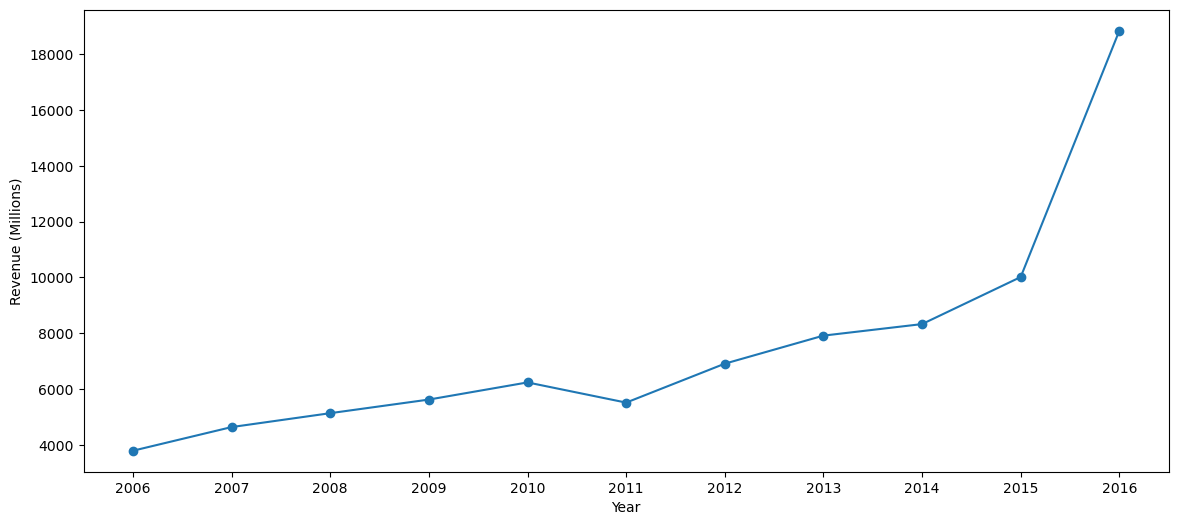

In [79]:
plt.subplots(figsize = (14,6))
plt.plot(revenue_by_year['Year'], revenue_by_year['Revenue (Millions)'], 'o-')
plt.xticks(np.arange(min(revenue_by_year.Year), max(revenue_by_year.Year)+1, 1))
plt.ylabel("Revenue (Millions)")
plt.xlabel("Year")

In [82]:
df_2016 = df[df['Year'] == 2016].reset_index()
del df_2016['index']
df_2016.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,count,Genre1,Genre2,Genre3,Actor1,Actor2,Actor3
0,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1,Horror,None,None,James McAvoy,Anya Taylor-Joy,"Haley Lu Richardson, Jessica Sula"
1,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,1,Animation,None,None,Matthew McConaughey,Reese Witherspoon,"Seth MacFarlane, Scarlett Johansson"
2,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1,Action,None,None,Will Smith,Jared Leto,"Margot Robbie, Viola Davis"
3,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,1,Action,None,None,Matt Damon,Tian Jing,"Willem Dafoe, Andy Lau"
4,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,1,Comedy,None,None,Ryan Gosling,Emma Stone,"Rosemarie DeWitt, J.K. Simmons"


In [90]:
top10_earning_2016 = df_2016.sort_values(by = 'Revenue (Millions)', ascending = False).head(10)
top10_voting_2016 = df_2016.sort_values(by = 'Votes', ascending = False).head(10)

In [86]:
px.bar(top10_earning_2016, y = 'Revenue (Millions)', x = 'Title', color = 'Genre1', 
       text = 'Rating', title = 'Most successful Movies/Genre of Year 2016')

In [89]:
px.bar(top10_voting_2016, y = 'Votes', x = 'Title', color = 'Genre1', 
       text = 'Rating', title = 'Most voting Movies/Genre of Year 2016')

In [95]:
# top 10 revenue movie/actor
act_rev = df.sort_values(by = 'Revenue (Millions)', ascending = False).head(10)
px.pie(act_rev, values = 'Revenue (Millions)', names = 'Actor1', title = 'Actors vs Revenue Distribution')

In [94]:
px.pie(top10, values='Revenue (Millions)', names='Title', title='Movies vs Revenue Distribution')